<a href="https://colab.research.google.com/github/Bino-01/Air-Line-Passengers/blob/Air-Passenger_1/Copy_of_Air_Passengers_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Graphical Visualisation
import seaborn as sns           # Statistical Visualisation

In [ ]:
# Reading the dataset
df = pd.read_csv('/content/AirPassengers.csv')
df.head()
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
"""df.shape
df.describe
df.describe()
df.info
df.info() """
df.iloc[2:27:3]
df.loc[1:4]

,Month,#Passengers
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
# Changing Columns Name
df.columns = ['Month', 'Passengers']
df.tail(10)

,Month,Passengers
134,1960-03,419
135,1960-04,461
136,1960-05,472
137,1960-06,535
138,1960-07,622
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [ ]:
# Setting Month as Index
df['Month']= pd.to_datetime(df['Month'], infer_datetime_format= True)
df = df.set_index('Month')
df.head()


/tmp/ipython-input-3776499773.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Month']= pd.to_datetime(df['Month'], infer_datetime_format= True)


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


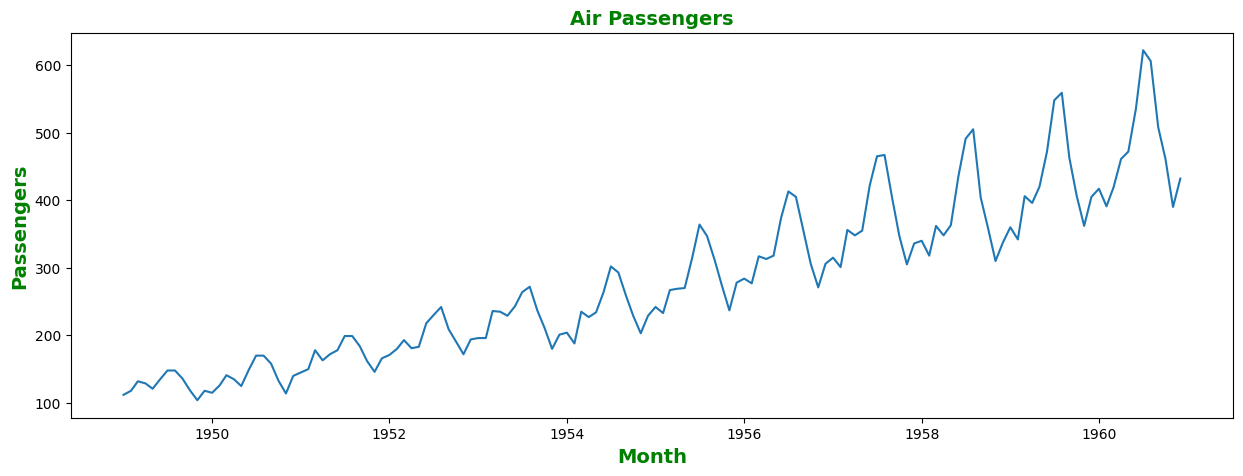

In [ ]:
# Plotting the TS Dataset
plt.style.available
#plt.style.use = 'seaborn-v0_8'
plt.style.use= 'ggplot'
plt.figure(figsize=(15,5), dpi = 100)
plt.xlabel('Month', color='green', fontdict={'fontweight':'bold', 'fontstyle':'normal', 'fontsize':14})
plt.ylabel('Passengers', color='green', fontdict={'fontweight':'bold', 'fontstyle':'normal', 'fontsize':14})
plt.title('Air Passengers', color='green', fontdict={'fontweight':'bold', 'fontstyle':'normal', 'fontsize':14})
plt.plot(df)
plt.show()

In [ ]:
# Splitting the Dataset between Training and Testing Sets
train = df.loc[df.index < '1960-01-01']
test = df.loc[df.index >= '1960-01-01']

In [ ]:
# Using the window shift to use the whole dataset as train and test set
y_hat_MA = test.copy()
window = 12
y_hat_MA['moving_avg_forecast'] = train['Passengers'].rolling(window).mean().iloc[-1]

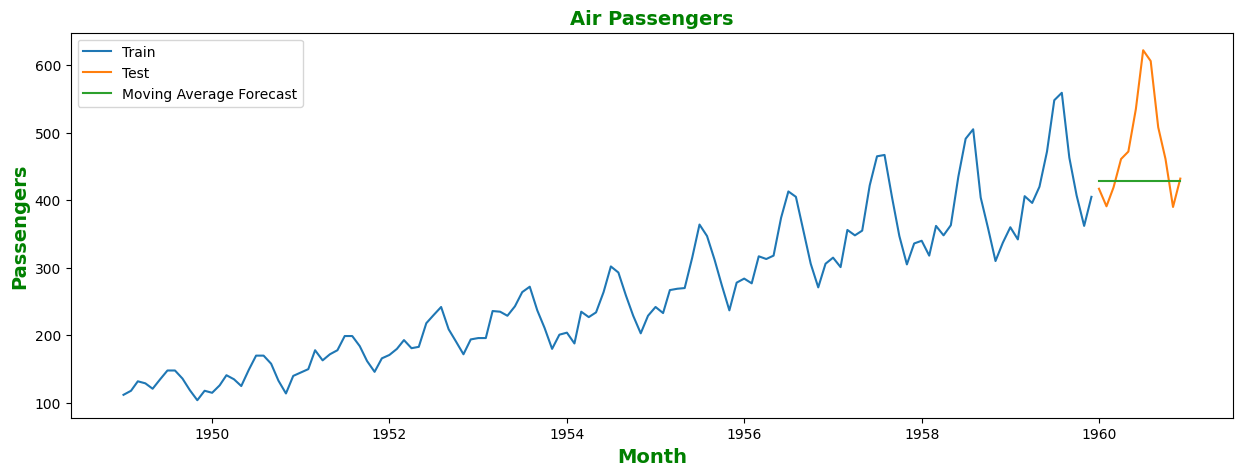

In [ ]:
# Plotting the Moving Average Forecasting
plt.figure(figsize=(15,5), dpi = 100)
plt.xlabel('Month', color='green', fontdict={'fontweight':'bold', 'fontstyle':'normal', 'fontsize':14})
plt.ylabel('Passengers', color='green', fontdict={'fontweight':'bold', 'fontstyle':'normal', 'fontsize':14})
plt.title('Air Passengers', color='green', fontdict={'fontweight':'bold', 'fontstyle':'normal', 'fontsize':14})
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_MA['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
# Accuracy Metrics
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_MA['moving_avg_forecast'])).round(2)
mape= np.round(np.mean(np.abs(test['Passengers'] - y_hat_MA['moving_avg_forecast'])/(test['Passengers']))*100,2)
mae = np.round(np.mean(np.abs(test['Passengers'] - y_hat_MA['moving_avg_forecast'])),2)

In [ ]:
# Printing the Accuracy Metrics Results
results = pd.DataFrame({'Method':['Method'], 'RMSE':[rmse], 'MAPE':[mape], 'MAE':[mae]})
results = results[['Method', 'RMSE', 'MAPE', 'MAE']]
results


,Method,RMSE,MAPE,MAE
0,Method,88.47,12.06,63.89
